<a href="https://colab.research.google.com/github/tsilverio/Desafio1_DataScience/blob/master/Desafio1_Thiago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Desafio_1

Agora vamos praticas tudo o que aprendemos no módulo 1 utilizando dados reais do CAGED (Cadastro Geral de Empregados e Desempregados)

<br>
<img src="img/caged.png" width='1200' >
<br>

O Cadastro Geral de Empregados e Desempregados (CAGED) foi criado como registro permanente de admissões e dispensa de empregados, sob o regime da Consolidação das Leis do Trabalho (CLT).

É utilizado pelo Programa de Seguro-Desemprego, para conferir os dados referentes aos vínculos trabalhistas, além de outros programas sociais.

Este Cadastro serve, ainda, como base para a elaboração de estudos, pesquisas, projetos e programas ligados ao mercado de trabalho, ao mesmo tempo em que subsidia a tomada de decisões para ações governamentais.

Visite o site do CAGED através [deste link](http://trabalho.gov.br/trabalhador-caged/2015-09-10-17-46-22) e acesse os dados clicando inicialemente em **ESTATÍSTICA** e depois em **MICRODADOS**, então acesse a base de dados do CAGED e baixe o último arquivo do ano de 2018 **CAGEDEST_122018.7z**. Além disso, baize também o arquivo **CAGEDEST_layout_Atualizado.xls** para o dicionário de dados.

Após isso, podemos começar as nossas análises:

1. **Importar as bibliotecas** e ler os dados: Importe as bibliotecas necessárias e verifique a cara dos dados e suas informações básicas dos conteúdos das colunas.

2. Limpeza e transformação da variável alvo **Salário Mensal**: verifique o tipo de dado da variával Salário Mensal, faça as devidas mudanças, plote a distribuição e dispersão dos dados e aplique a transformação matemática para a correção da assimetria.

3. Verificação dos dados da variável **Idade**: verifique os dados da variável Idade, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados.

4. Verificação dos dados da variável **Grau de Instrução**: verifique os dados da variável Grau de instrução, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados.

5. Verificação dos dados da variável **Sexo**: verifique os dados da variável Sexo, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados. Depois disso, faça uma inferência estatística pra verificar se os homens ganham mais que as mulheres.

6. Verificação dos dados da variável **Raça Cor**: verifique os dados da variável Raça Cor, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados. Depois disso, faça uma inferência estatística pra verificar se os brancos ganham mais que os outros grupos étnicos.

7. Elaborar uma hipótese para ser rejeitada ou não-rejeitada por você de acordo com o resultado da sua análise, através da utilização dos dados do CAJED considerando as suas colunas.

8. Avançado: plote **todas as correlações das variávies numéricas entre si**. Sugestão busque uma biblioteca chamada SEABORN e plote um heatmap com as correlações.

<!--9. Avançado: Plote uma **regressão múltipla**.-->


In [0]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd 
df=pd.read_csv('gdrive/My Drive/Desafio 1-20190910/CAGEDEST_122018.txt', encoding='latin-1', delimiter = ';')

In [4]:
df.head()

,Admitidos/Desligados,Competência Declarada,Município,Ano Declarado,CBO 2002 Ocupação,CNAE 1.0 Classe,CNAE 2.0 Classe,CNAE 2.0 Subclas,Faixa Empr Início Jan,Grau Instrução,Qtd Hora Contrat,IBGE Subsetor,Idade,Ind Aprendiz,Ind Portador Defic,Raça Cor,Salário Mensal,Saldo Mov,Sexo,Tempo Emprego,Tipo Estab,Tipo Defic,Tipo Mov Desagregado,UF,Bairros SP,Bairros Fortaleza,Bairros RJ,Distritos SP,Regiões Adm DF,Mesorregião,Microrregião,Região Adm RJ,Região Adm SP,Região Corede,Região Corede 04,Região Gov SP,Região Senac PR,Região Senai PR,Região Senai SP,Sub-Região Senai PR,Ind Trab Parcial,Ind Trab Intermitente
0,1,201812,500215,2018,711210,1619,1610,161003,1,6,40,25,24,0,0,8,"000954,00",1,1,"0000,0",1,0,1,50,{ñ c,{ñ c,{ñ c,{ñ c,0,5004,50009,{ñ,999,{ñ,99,999,99,{ñ,999,99,0,0
1,1,201812,500710,2018,321210,2119,2101,210101,1,8,44,25,25,0,0,2,"002500,00",1,1,"0000,0",1,0,1,50,{ñ c,{ñ c,{ñ c,{ñ c,0,5003,50007,{ñ,999,{ñ,99,999,99,{ñ,999,99,0,0
2,1,201812,500460,2018,623110,1619,1610,161003,1,2,1,25,55,0,0,8,"000000,00",1,1,"0000,0",1,0,1,50,{ñ c,{ñ c,{ñ c,{ñ c,0,5004,50011,{ñ,999,{ñ,99,999,99,{ñ,999,99,0,1
3,1,201812,500460,2018,623110,1619,1610,161003,1,2,1,25,52,0,0,8,"000000,00",1,1,"0000,0",1,0,1,50,{ñ c,{ñ c,{ñ c,{ñ c,0,5004,50011,{ñ,999,{ñ,99,999,99,{ñ,999,99,0,1
4,1,201812,500460,2018,623110,1619,1610,161003,1,2,1,25,32,0,0,8,"000000,00",1,1,"0000,0",1,0,1,50,{ñ c,{ñ c,{ñ c,{ñ c,0,5004,50011,{ñ,999,{ñ,99,999,99,{ñ,999,99,0,1


In [5]:
df.shape

(2256752, 42)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256752 entries, 0 to 2256751
Data columns (total 42 columns):
Admitidos/Desligados     int64
Competência Declarada    int64
Município                int64
Ano Declarado            int64
CBO 2002 Ocupação        int64
CNAE 1.0 Classe          int64
CNAE 2.0 Classe          int64
CNAE 2.0 Subclas         int64
Faixa Empr Início Jan    int64
Grau Instrução           int64
Qtd Hora Contrat         int64
IBGE Subsetor            int64
Idade                    int64
Ind Aprendiz             int64
Ind Portador Defic       int64
Raça Cor                 int64
Salário Mensal           object
Saldo Mov                int64
Sexo                     int64
Tempo Emprego            object
Tipo Estab               int64
Tipo Defic               int64
Tipo Mov Desagregado     int64
UF                       int64
Bairros SP               object
Bairros Fortaleza        object
Bairros RJ               object
Distritos SP             object
Regiões Adm D

In [7]:
df_desafio = df[['Idade','Salário Mensal','Grau Instrução','Sexo', 'Raça Cor']]
df_desafio['Salário Mensal'] = df_desafio['Salário Mensal'].map(lambda x: float(re.sub(r',', '.', x)))
df_desafio.loc[df_desafio['Salário Mensal'] == 0, 'Salário Mensal'] = round(df_desafio['Salário Mensal'].mean(),2)
df_desafio.head()

,Idade,Salário Mensal,Grau Instrução,Sexo,Raça Cor
0,24,954.00,6,1,8
1,25,2500.00,8,1,2
2,55,1627.24,2,1,8
3,52,1627.24,2,1,8
4,32,1627.24,2,1,8


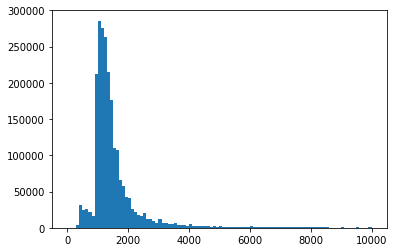

In [14]:
#Item 2 - Histograma Salario
plt.hist(df_desafio['Salário Mensal'], bins=100, range=(0, 10000))
plt.show()

10.960189422200093


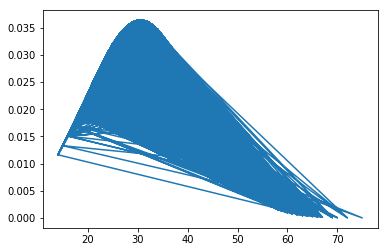

In [16]:
from scipy.stats import norm #https://docs.scipy.org/doc/scipy/reference/
import matplotlib.pyplot as plt
import statistics
std_idade = statistics.stdev(df_desafio['Idade'])
std_salario = statistics.stdev(df_desafio['Salário Mensal'])
idade = df_desafio['Idade'][:10000]
idade
print(std_idade)
#print(std_salario)


plt.plot(idade, norm.pdf(idade,idade.mean(),std_idade), label='Idade')

#plt.legend(loc='upper left')

plt.show()

In [17]:
from scipy.stats import spearmanr
spearman = spearmanr(df_desafio['Idade'], df_desafio['Salário Mensal'])
spearman[0]

0.296566729675862

In [19]:
from scipy.stats import kendalltau
tau = kendalltau(df_desafio['Idade'], df_desafio['Salário Mensal'])
tau[0]

0.20518732381147115

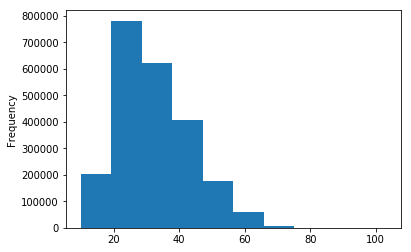

In [20]:
#Item 3 - Histograma Idade
df_desafio['Idade'].plot.hist()

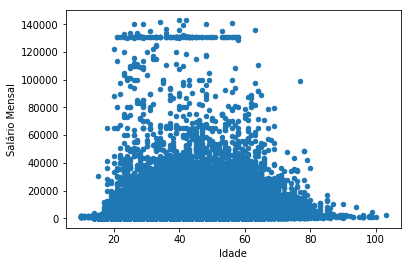

In [21]:
#Item 3 - Dispersão Idade / Saário Mensal
df_desafio.plot.scatter(x='Idade', y='Salário Mensal')

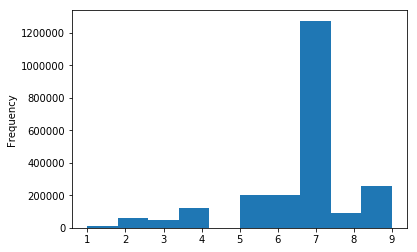

In [26]:
#Item 4 -
df_desafio['Grau Instrução'].plot.hist()

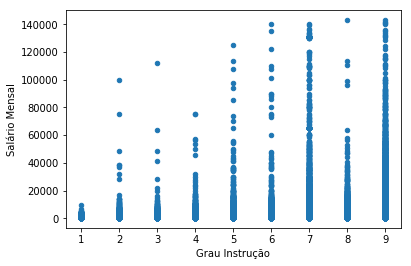

In [27]:
# Item 4 - Dipersão Grau Instrução e Salario
df_desafio.plot.scatter(x='Grau Instrução', y='Salário Mensal')

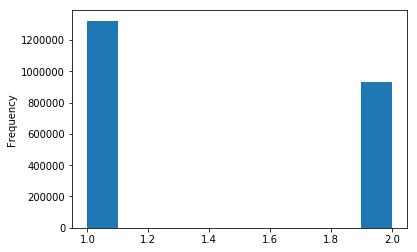

In [28]:
# Item 5 - Histograma Sexo
df_desafio['Sexo'].plot.hist()

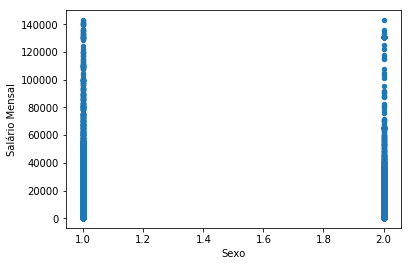

In [29]:
# Item 5 - Dipersão Sexo e Salario
df_desafio.plot.scatter(x='Sexo', y='Salário Mensal')

Salário Médio dos Homens:  1717.7
Salário Médio das Mulheres:  1541.31


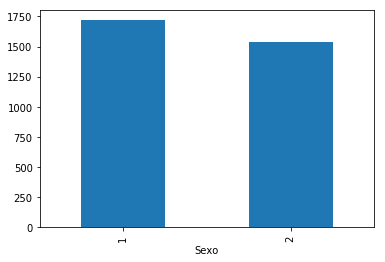

In [78]:
#Item 5 - Calculando a média Salarial de homens e mulheres
Media_Homens = df_desafio.loc[df_desafio['Sexo'] == 1].mean()
Media_Mulheres = df_desafio.loc[df_desafio['Sexo'] == 2].mean()

print('Salário Médio dos Homens: ',round(Media_Homens['Salário Mensal'],2))
print('Salário Médio das Mulheres: ',round(Media_Mulheres['Salário Mensal'],2))


Media_Sexo = df_desafio.groupby(['Sexo'])
Media_Sexo['Salário Mensal'].mean().plot.bar()


#import seaborn as sns
#plt.figure(figsize=(15,10))
#sns.countplot(df_desafio['Sexo'])
#plt.show()




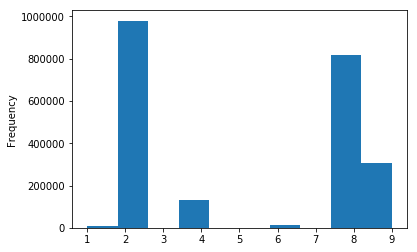

In [50]:
#Item 6 - Histograma Raça Cor
df_desafio['Raça Cor'].plot.hist()

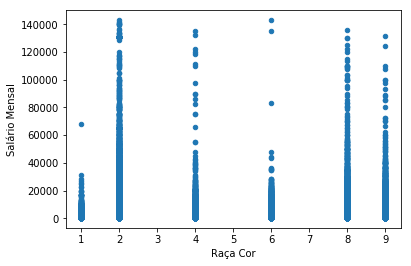

In [51]:
# Item 6 - Dipersão Raça Cor e Salario
df_desafio.plot.scatter(x='Raça Cor', y='Salário Mensal')

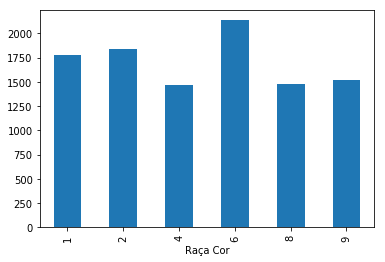

In [76]:
#Item 6 - Calculando a média Salarial Raça Cor
Media_RaçaCor = df_desafio.groupby(['Raça Cor'])
Media_RaçaCor['Salário Mensal'].mean().plot.bar()

#import seaborn as sns
#plt.figure(figsize=(20,20))
#sns.countplot(Media_RaçaCor['Salário Mensal'].mean())
#plt.show()
#plt.hist(Media_RaçaCor['Salário Mensal'].mean())